In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import styling

In [2]:
# Continuous dynamics data
with open('continuous_dyn_example.pkl', 'rb') as f:
    continuous_dyn_report = pickle.load(f)

In [3]:
# Logistic map data
results_path = 'logistic_map/results_training_loop_inspection/'
os.listdir(results_path)
report = {}
for filename in os.listdir(results_path):
    model_name = filename.split('_')[0]
    if model_name not in report:
        report[model_name] = []
    with open(results_path + filename, 'rb') as f:
        restored = pickle.load(f)
    report[model_name].append(restored)

ordered_models = [
    'DPNets',
    'DPNets-relaxed',
    'VAMPNets'
]


In [29]:
dEV = continuous_dyn_report['eigenvalues']

DPNets - 0.07717539020449751
DPNets-relaxed - 0.050466887371093914
VAMPNets - 0.14667265058771722


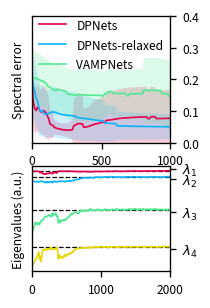

In [37]:
fig, axes = plt.subplots(2, 1, figsize=styling.figsize(0.3, 1/1.5), height_ratios=[1.2, 1])

# Logistic Map
ax = axes[0]

for model_name in ordered_models:
    hausdorff_distance = np.array(report[model_name])
    hdm = hausdorff_distance.mean(axis=0)
    print(f"{model_name} - {hdm[-1]}")
    hds = hausdorff_distance.std(axis=0)
    training_steps = 10*np.arange(len(hdm))
    ax.plot(training_steps, hdm, label=model_name)
    ax.fill_between(
        training_steps,
        hdm - hds,
        hdm + hds,
        alpha=0.2
    )
    ax.yaxis.tick_right()

settings = {
    'xlabel': 'Training steps',
    'ylabel': 'Spectral error',
    'ylim': (0, 0.4),
    'xticks': (0, 500, 990),
    'xticklabels': (0, 500, 1000)
}
ax.legend(frameon=False, bbox_to_anchor=(0.5, 0.77), ncol=1, loc='center')
ax.set(**settings)
ax.set_xmargin(0)

# Continuous dynamics
ax = axes[1]
for v in continuous_dyn_report['reference']:
    ax.axhline(v, color='k', linestyle='--', lw=0.75)

ax.plot(continuous_dyn_report['step'], dEV)

v = np.squeeze(continuous_dyn_report['reference']).copy()
settings = {
    'ylabel': 'Eigenvalues (a.u.)',
    'yticks':  v + 5*np.sign(v),
    'yticklabels': [rf"$\lambda_{i}$" for i in range(1, 5)],
}
ax.set(**settings)
ax.margins(x=0)
ax.yaxis.tick_right()

fig.subplots_adjust(top = 0.98, bottom = 0.12, left = 0.1, right = 0.8)
fig.savefig('eigvals.pdf')